<a href="https://colab.research.google.com/github/Claucs88/Desaf-o2_An-lisis_TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [5]:
import pandas as pd
from pandas import json_normalize

# Cargar el archivo JSON en un DataFrame

ruta_archivo = '/content/TelecomX_Data.json'
df = pd.read_json(ruta_archivo)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [10]:
df.iloc[0]

,0
customerID,0002-ORFBO
Churn,No
customer,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
phone,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
internet,"{'InternetService': 'DSL', 'OnlineSecurity': '..."
account,"{'Contract': 'One year', 'PaperlessBilling': '..."


#🔧 Transformación

In [12]:
# Normalizar las columnas anidadas
df_normalizado = json_normalize(df.to_dict(orient='records'))
df_normalizado.head()

# Revisamos todas las columnas disponibles
df_normalizado.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

## **Valores únicos**

In [15]:
# Valores nulos por columna
print("Valores nulos por columna:")
print(df_normalizado.isnull().sum())

Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


## **Valores duplicados**

In [16]:
duplicados = df_normalizado.duplicated(subset='customerID').sum()
print(f"\nCantidad de clientes duplicados: {duplicados}")


Cantidad de clientes duplicados: 0


## **Consistencia en las columnas categóricas**

In [17]:
# Columnas categóricas
categoricas = [
    'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

print("\nValores únicos por columna categórica:")
for col in categoricas:
    print(f"{col}: {df_normalizado[col].unique()}")


Valores únicos por columna categórica:
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [19]:
# Revisar cuántos registros vacíos hay
vacios = df_normalizado[df_normalizado['Churn'] == '']
print(f"Cantidad de registros con Churn vacío: {vacios.shape[0]}")

Cantidad de registros con Churn vacío: 224


In [20]:
# Eliminar registros donde Churn está vacío
df_normalizado = df_normalizado[df_normalizado['Churn'] != '']

# Verificar que se eliminaron correctamente
print(f"Cantidad de registros después de eliminar Churn vacío: {df_normalizado.shape[0]}")

Cantidad de registros después de eliminar Churn vacío: 7043


In [23]:
# Convertir valores

# Convertir columnas numéricas a tipo float
df_normalizado['account.Charges.Monthly'] = pd.to_numeric(df_normalizado['account.Charges.Monthly'], errors='coerce')
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

# Verificar si hay valores que no se pudieron convertir
print("Valores nulos tras conversión en account.Charges.Total:", df_normalizado['account.Charges.Total'].isnull().sum())

Valores nulos tras conversión en account.Charges.Total: 11


In [25]:
#Eliminar registros con Charges.Total nulo
df_normalizado = df_normalizado.dropna(subset=['account.Charges.Total'])

# Verificar
print("Cantidad de registros después de eliminar nulos en Charges.Total:", df_normalizado.shape[0])


Cantidad de registros después de eliminar nulos en Charges.Total: 7032


In [24]:
#Revisar duplicados

duplicados = df_normalizado.duplicated(subset='customerID').sum()
print(f"Cantidad de clientes duplicados: {duplicados}")

# Revisar consistencia en columnas categóricas
categoricas = [
    'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

print("\nValores únicos por columna categórica:")
for col in categoricas:
    print(f"{col}: {df_normalizado[col].unique()}")


#Revisar columnas numéricas
numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

print("\nEstadísticas básicas de columnas numéricas:")
print(df_normalizado[numericas].describe())

# Verificar valores negativos o cero en Charges
for col in ['account.Charges.Monthly', 'account.Charges.Total']:
    negativos = (df_normalizado[col] < 0).sum()
    print(f"Cantidad de valores negativos en {col}: {negativos}")


Cantidad de clientes duplicados: 0

Valores únicos por columna categórica:
Churn: ['No' 'Yes']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Estadísticas básicas de columnas numéricas:
       customer.tenure  account.Charges.Monthly  accou

## **Columnas de servicios con valores especiales**

In [26]:
# Columnas de servicios con valores especiales
columnas_servicio = [
    'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]

# Reemplazar 'No phone service' y 'No internet service' por 'No'
df_normalizado[columnas_servicio] = df_normalizado[columnas_servicio].replace({
    'No phone service': 'No',
    'No internet service': 'No'
})

# Verificar que los cambios se aplicaron correctamente
for col in columnas_servicio:
    print(f"{col}: {df_normalizado[col].unique()}")

phone.MultipleLines: ['No' 'Yes']
internet.OnlineSecurity: ['No' 'Yes']
internet.OnlineBackup: ['Yes' 'No']
internet.DeviceProtection: ['No' 'Yes']
internet.TechSupport: ['Yes' 'No']
internet.StreamingTV: ['Yes' 'No']
internet.StreamingMovies: ['No' 'Yes']


## **CREAR COLUMNAS CUENTAS DIARIAS**

In [27]:
# Crear columna 'Cuentas_Diarias' como facturación diaria promedio
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30

# Redondear a 2 decimales para mayor claridad
df_normalizado['Cuentas_Diarias'] = df_normalizado['Cuentas_Diarias'].round(2)

# Verificar
df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


## **Estandarización y transformación de datos**

In [29]:
# Columnas binarias: Yes -> 1, No -> 0
binarias = [
    'Churn', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling'
]

df_normalizado[binarias] = df_normalizado[binarias].replace({'Yes': 1, 'No': 0})


df_normalizado.rename(columns={
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Mayor_65',
    'customer.tenure': 'Meses_Contrato',
    'account.Contract': 'Tipo_Contrato',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargos_Mensuales',
    'account.Charges.Total': 'Cargos_Totales',
    'Cuentas_Diarias': 'Gasto_Diario'
}, inplace=True)


df_normalizado['Genero'] = df_normalizado['Genero'].replace({'Female': 0, 'Male': 1})


# Revisar las primeras filas y tipos de datos
df_normalizado.head()
df_normalizado.dtypes


,0
customerID,object
Churn,int64
Genero,int64
Mayor_65,int64
customer.Partner,int64
customer.Dependents,int64
Meses_Contrato,int64
phone.PhoneService,int64
phone.MultipleLines,int64
internet.InternetService,object


#📊 Carga y análisis

## **Análisis descriptivo**

In [30]:
# Seleccionar columnas numéricas para análisis descriptivo
numericas = ['Meses_Contrato', 'Cargos_Mensuales', 'Cargos_Totales', 'Gasto_Diario']

# Estadísticas descriptivas básicas
print("Estadísticas descriptivas de columnas numéricas:")
print(df_normalizado[numericas].describe())

# Mediana
print("\nMediana de columnas numéricas:")
print(df_normalizado[numericas].median())

# Desviación estándar
print("\nDesviación estándar de columnas numéricas:")
print(df_normalizado[numericas].std())

# Resumen de columnas binarias (Churn y servicios)
binarias = [
    'Churn', 'Genero', 'Mayor_65', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling'
]

print("\nDistribución de columnas binarias:")
for col in binarias:
    print(f"{col}:\n{df_normalizado[col].value_counts(normalize=True)*100} %\n")


Estadísticas descriptivas de columnas numéricas:
       Meses_Contrato  Cargos_Mensuales  Cargos_Totales  Gasto_Diario
count     7032.000000       7032.000000     7032.000000   7032.000000
mean        32.421786         64.798208     2283.300441      2.159891
std         24.545260         30.085974     2266.771362      1.002955
min          1.000000         18.250000       18.800000      0.610000
25%          9.000000         35.587500      401.450000      1.187500
50%         29.000000         70.350000     1397.475000      2.340000
75%         55.000000         89.862500     3794.737500      2.992500
max         72.000000        118.750000     8684.800000      3.960000

Mediana de columnas numéricas:
Meses_Contrato        29.000
Cargos_Mensuales      70.350
Cargos_Totales      1397.475
Gasto_Diario           2.340
dtype: float64

Desviación estándar de columnas numéricas:
Meses_Contrato        24.545260
Cargos_Mensuales      30.085974
Cargos_Totales      2266.771362
Gasto_Diario      

## **Distribución de evasión**

/tmp/ipython-input-4277844175.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["#66bb6a", "#ef5350"])
/tmp/ipython-input-4277844175.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["#66bb6a", "#ef5350"])


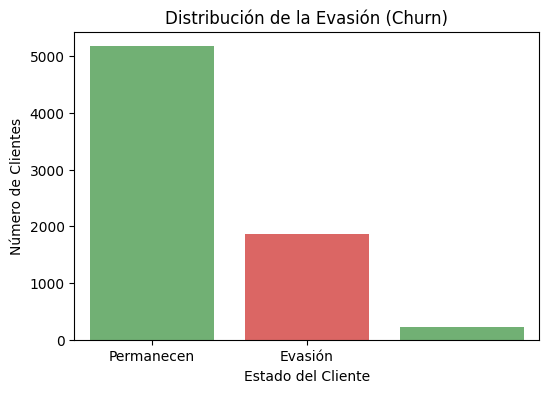

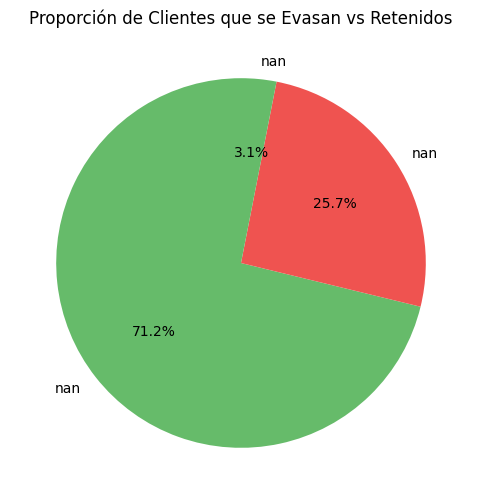

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de churn
churn_counts = df["Churn"].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["#66bb6a", "#ef5350"])
plt.xticks([0,1], ["Permanecen", "Evasión"])
plt.title("Distribución de la Evasión (Churn)")
plt.ylabel("Número de Clientes")
plt.xlabel("Estado del Cliente")
plt.show()

# Gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(churn_counts,
        labels=churn_counts.index.map({0: "Permanecen", 1: "Evasión"}),
        autopct='%1.1f%%',
        colors=["#66bb6a", "#ef5350"],
        startangle=90)
plt.title("Proporción de Clientes que se Evasan vs Retenidos")
plt.show()



In [34]:
df_normalizado.head()
df_normalizado.dtypes

,0
customerID,object
Churn,int64
Genero,int64
Mayor_65,int64
customer.Partner,int64
customer.Dependents,int64
Meses_Contrato,int64
phone.PhoneService,int64
phone.MultipleLines,int64
internet.InternetService,object


## **Recuento de evasión por variables categóricas**

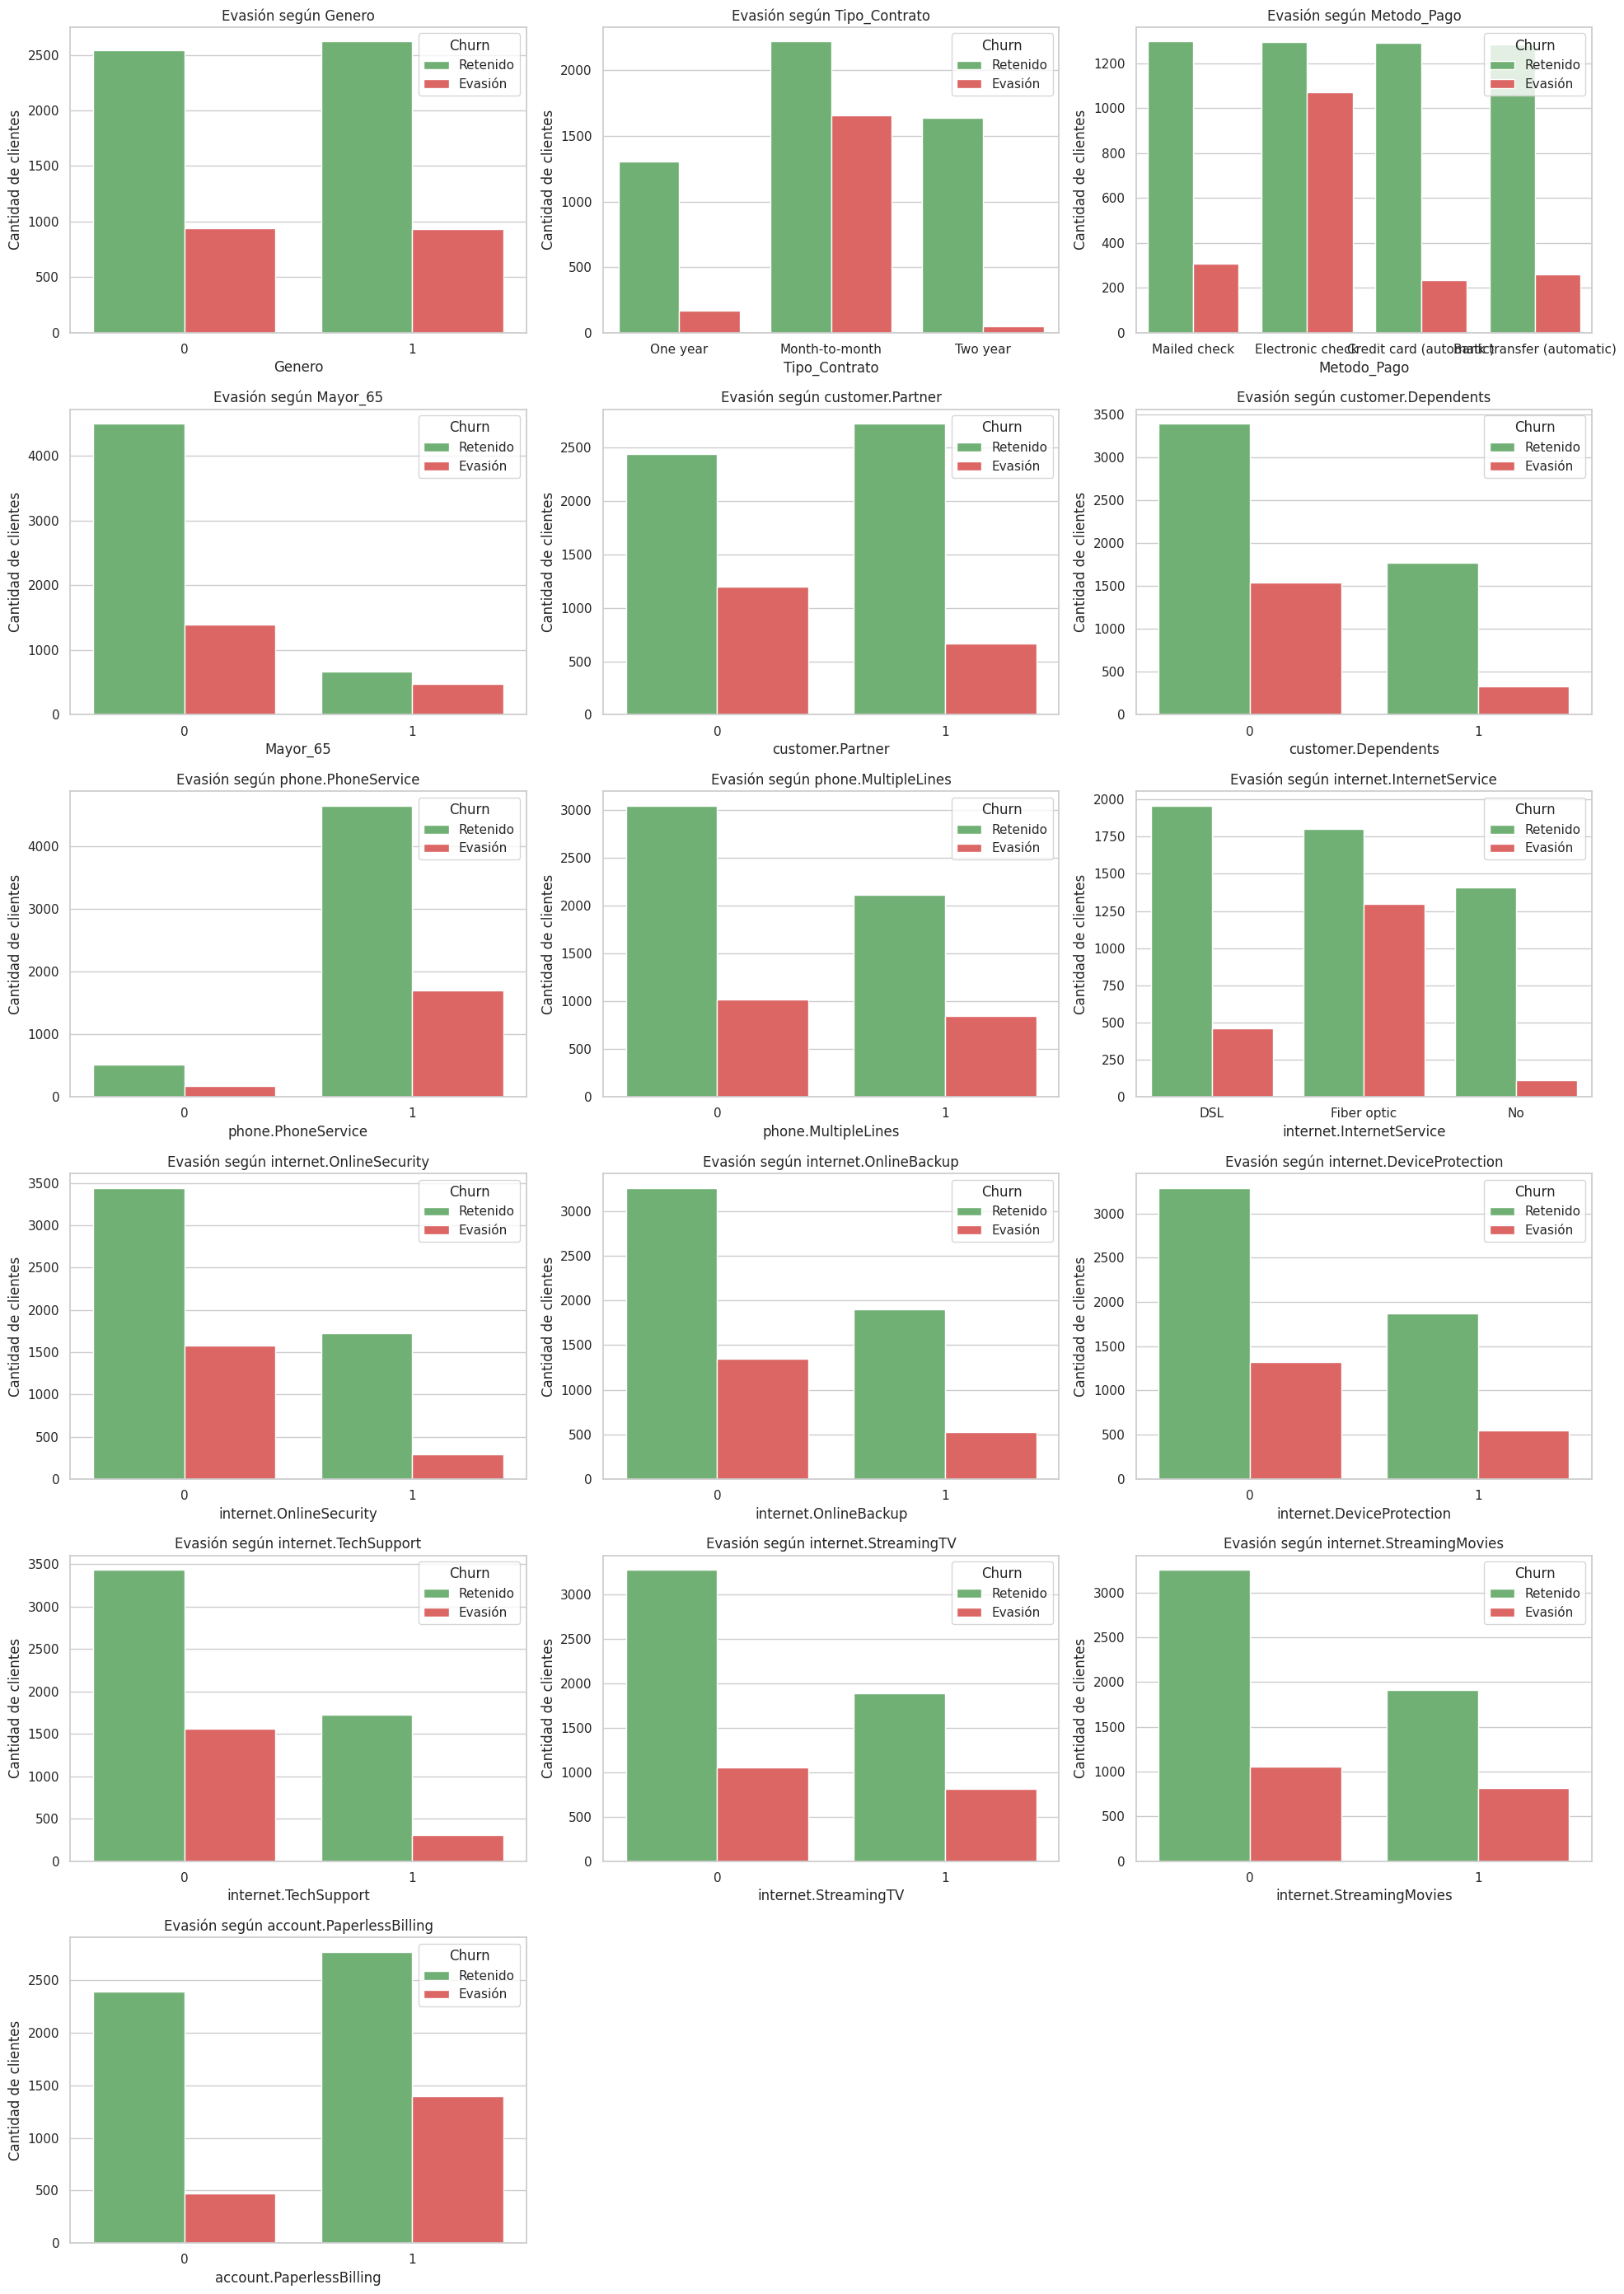

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas a analizar
categoricas = [
    'Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Mayor_65',
    'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies', 'account.PaperlessBilling'
]

# Configuración general de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(20, 28))

# Iterar sobre cada columna categórica y graficar Churn
for i, col in enumerate(categoricas):
    plt.subplot(6, 3, i+1)  # 6 filas, 3 columnas de subplots
    sns.countplot(x=col, hue='Churn', data=df_normalizado, palette=["#66bb6a", "#ef5350"])

    plt.title(f"Evasión según {col}", fontsize=12)
    plt.ylabel("Cantidad de clientes")
    plt.xlabel(col)
    plt.legend(title='Churn', labels=['Retenido', 'Evasión'])

plt.tight_layout()
plt.show()

## **Conteo de evasión por variables numéricas**

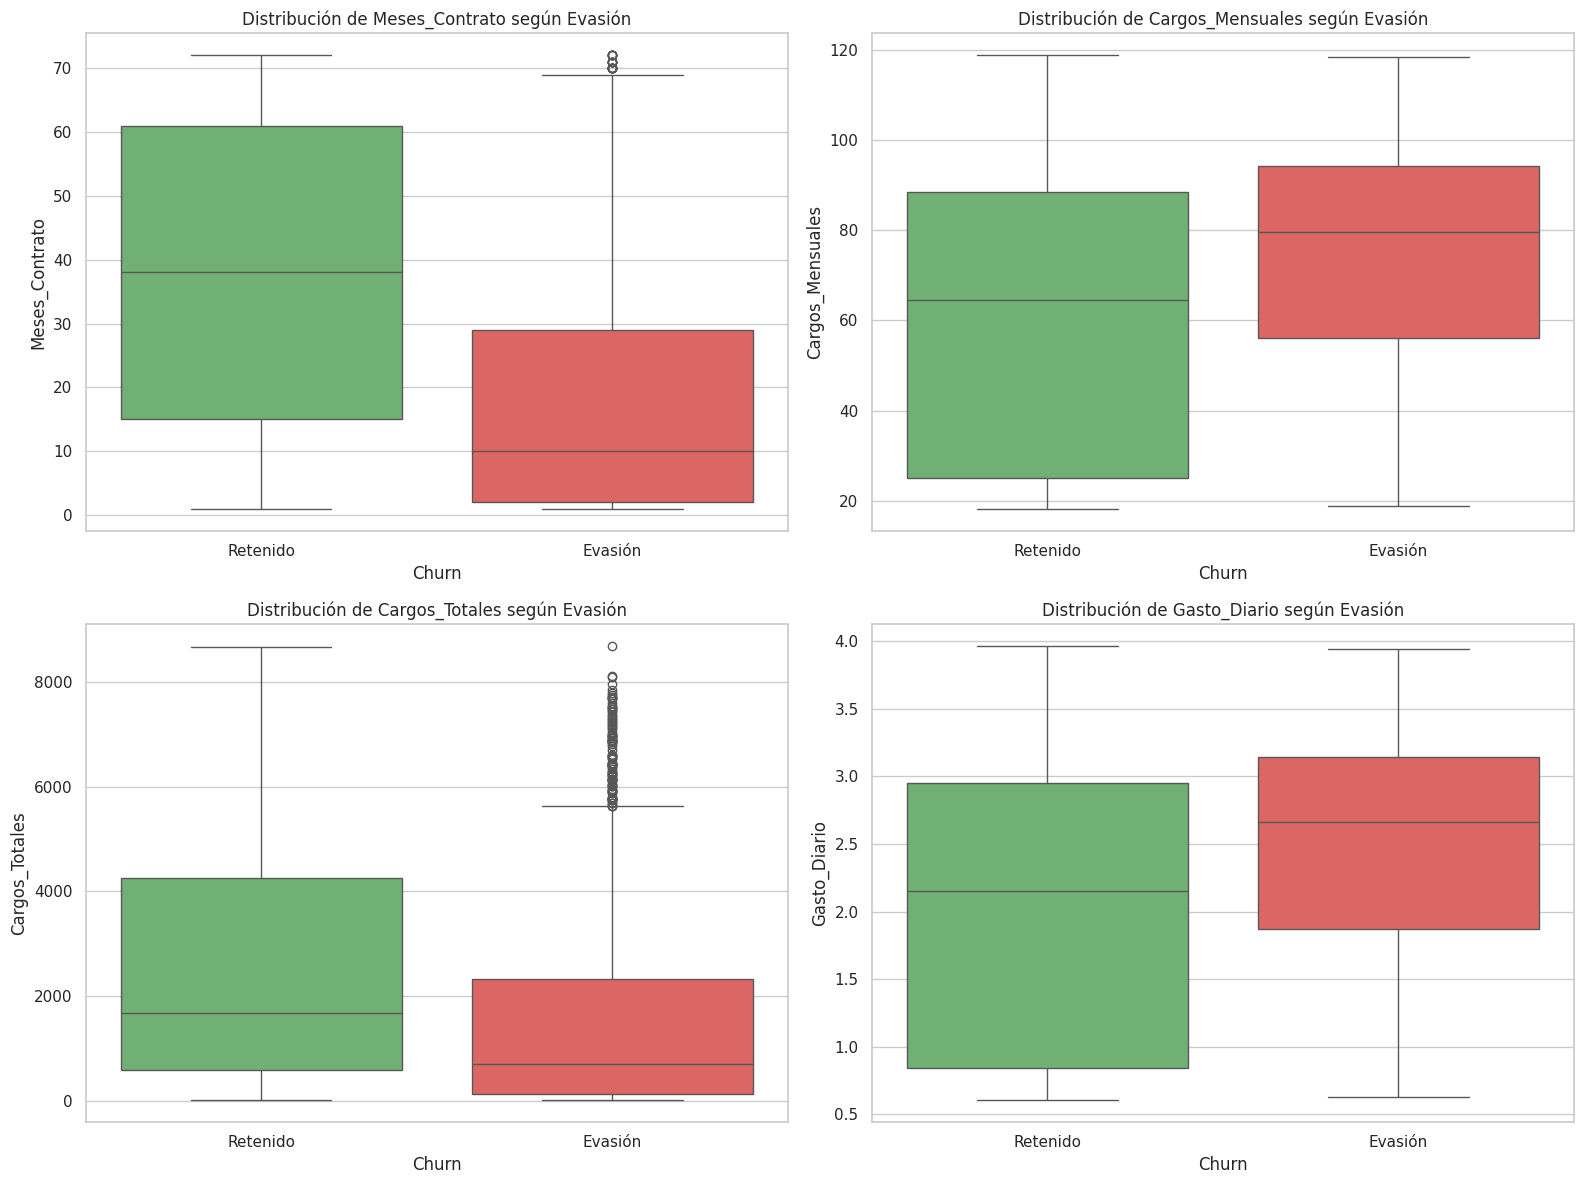

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
numericas = ['Meses_Contrato', 'Cargos_Mensuales', 'Cargos_Totales', 'Gasto_Diario']

sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

for i, col in enumerate(numericas):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Churn', y=col, data=df_normalizado, hue='Churn', palette=["#66bb6a", "#ef5350"], dodge=False, legend=False)
    plt.title(f"Distribución de {col} según Evasión")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.xticks([0,1], ['Retenido', 'Evasión'])

plt.tight_layout()
plt.show()

## **Análisis de correlación entre variables**

### **Correlación general entre variables numéricas**

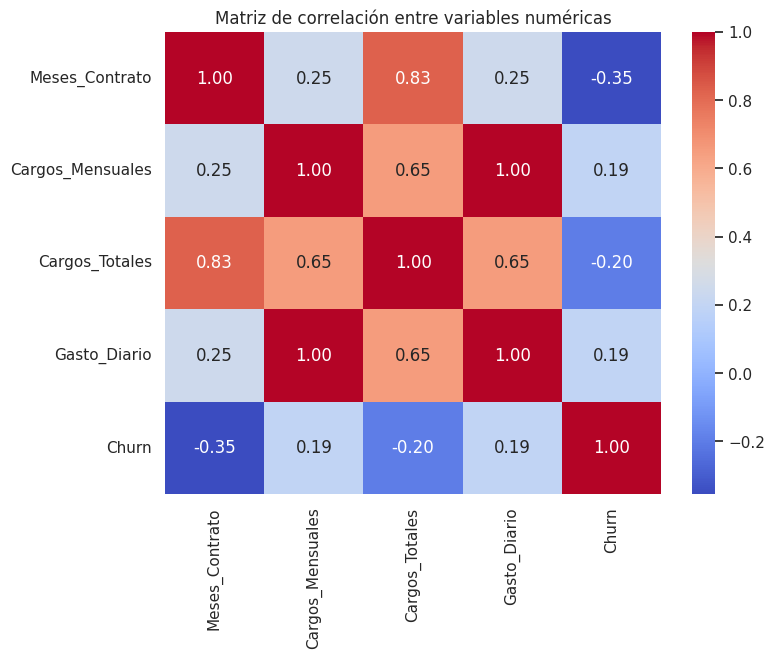

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas
numericas = ['Meses_Contrato', 'Cargos_Mensuales', 'Cargos_Totales', 'Gasto_Diario', 'Churn']

# Calcular matriz de correlación
corr_matrix = df_normalizado[numericas].corr()

# Visualizar con un heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


### **Correlación entre Churn y cantidad de servicios**

/tmp/ipython-input-2913314152.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Servicios_Contratados', data=df_normalizado, palette=["#66bb6a", "#ef5350"])


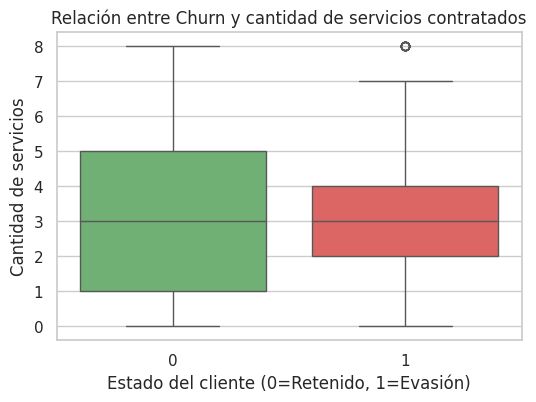

                          Churn  Servicios_Contratados
Churn                  1.000000              -0.067459
Servicios_Contratados -0.067459               1.000000


In [40]:
# Columnas de servicios
servicios = [
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]

# Crear nueva columna: número total de servicios contratados
df_normalizado['Servicios_Contratados'] = df_normalizado[servicios].sum(axis=1)

# Scatter plot de Churn vs Servicios_Contratados
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Servicios_Contratados', data=df_normalizado, palette=["#66bb6a", "#ef5350"])
plt.title("Relación entre Churn y cantidad de servicios contratados")
plt.ylabel("Cantidad de servicios")
plt.xlabel("Estado del cliente (0=Retenido, 1=Evasión)")
plt.show()

# Correlación numérica
corr_servicios = df_normalizado[['Churn','Servicios_Contratados']].corr()
print(corr_servicios)


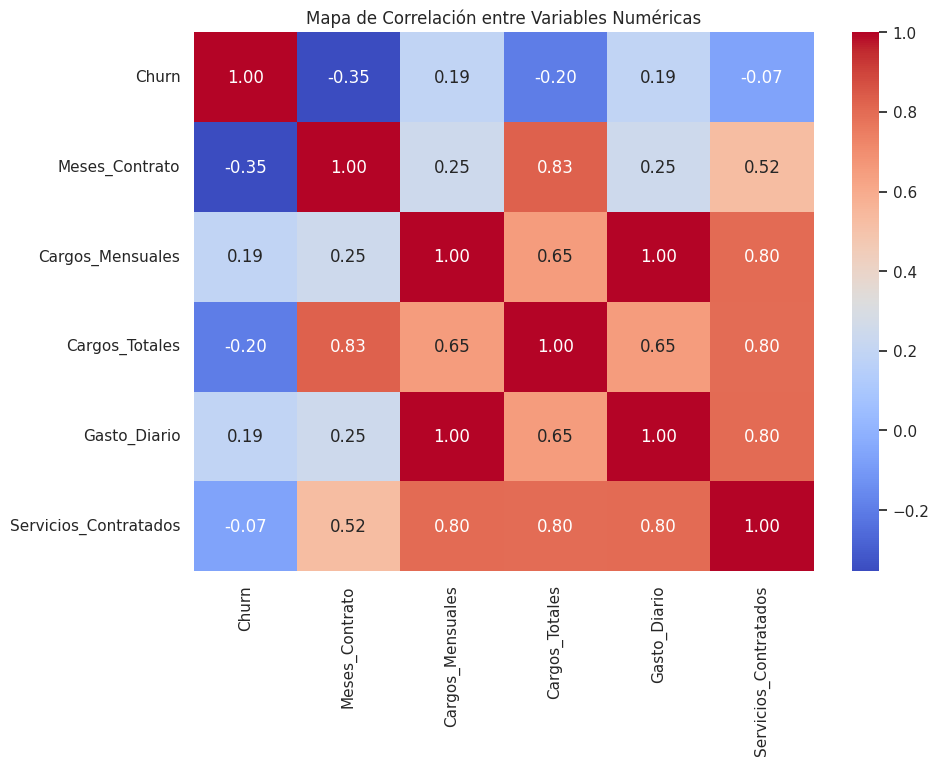

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas
numericas = ['Churn', 'Meses_Contrato', 'Cargos_Mensuales', 'Cargos_Totales', 'Gasto_Diario', 'Servicios_Contratados']

# Calcular matriz de correlación
corr_matrix = df_normalizado[numericas].corr()

# Configuración del gráfico
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Mapa de Correlación entre Variables Numéricas")
plt.show()


**Análisis de Correlación entre Variables**

**1.Churn y Meses_Contrato (-0.35)**

Existe una correlación negativa moderada, lo que indica que los clientes con contratos más largos tienden a tener menor probabilidad de evasión.

Implicación: fidelizar a los clientes mediante contratos más largos podría reducir el churn.

**2.Churn y Cargos_Mensuales / Gasto_Diario (0.19)**

Hay una correlación positiva baja, lo que sugiere que clientes con mayor gasto mensual o diario tienen ligeramente más tendencia a abandonar.

Implicación: se podría investigar si los clientes con facturas más altas perciben menos valor en el servicio.

**3.Churn y Servicios_Contratados (-0.07)**

La relación es casi nula, indicando que la cantidad de servicios por sí sola no es un factor determinante de evasión.

**4.Correlaciones internas fuertes**

Meses_Contrato y Cargos_Totales (0.83)

Cargos_Mensuales, Gasto_Diario y Servicios_Contratados (~0.65–0.80)

Esto es lógico: más tiempo y más servicios contratados generan cargos totales más altos y gasto diario mayor.**

#📄Informe final

## **Análisis de Evasión de Clientes**

**Análisis de Evasión de Clientes**

**1. Introducción**

**Objetivo:** El objetivo de este análisis es identificar patrones de cancelación de clientes para mejorar la retención.


**2. Limpieza y Tratamiento de Datos**
Se realizaron los siguientes pasos para preparar el dataset:

Carga y normalización del JSON con json_normalize para convertir columnas anidadas en planas.

Valores nulos:

Eliminación de registros donde Churn estaba vacío (224 registros eliminados).

Conversión de account.Charges.Monthly y account.Charges.Total a tipo numérico, eliminando 11 registros con problemas.

Duplicados: verificación de customerID (0 duplicados).

Consistencia de categorías:

Reemplazo de No phone service y No internet service por No.

Unificación de valores binarios: Yes → 1, No → 0.

Renombrado y estandarización de columnas:

Ejemplo: Meses_Contrato, Cargos_Mensuales, Cargos_Totales, Gasto_Diario.

Creación de nuevas columnas:

Gasto_Diario como promedio diario de facturación mensual.


**3. Análisis Exploratorio de Datos**

**3.1 Estadísticas descriptivas de variables numéricas**

**Datos:** 7.032 clientes, sin duplicados ni valores nulos relevantes. Variables incluyen demográficas, tipo de contrato, métodos de pago, servicios y consumo.

Meses_Contrato: promedio 32.4, mediana 29, máximo 72.

Cargos_Mensuales: promedio 64.8, mediana 70.35.

Cargos_Totales: gran dispersión (std=2266), clientes con consumos muy distintos.

Gasto_Diario: promedio 2.16, mediana 2.34

**3.2 Distribución de evasión general**
Aproximadamente 26.6% de los clientes han cancelado su servicio.

**3.3 Distribución de Churn según variables categóricas**

Clientes con contratos Month-to-month presentan mayor tendencia a cancelar.

Métodos de pago como Electronic check se asocian a mayor Churn.

Servicios adicionales reducen la probabilidad de evasión.

**3.4 Distribución de Churn según variables numéricas**
Clientes con menor tiempo de contrato y menor gasto diario tienden a cancelar más.

Clientes con contratos largos y mayor facturación tienen menor probabilidad de Churn.

**Conclusiones:**

La evasión total es del 26.6%, un área relevante de mejora.

Factores de riesgo de Churn: contratos cortos, menor gasto diario, pocos servicios contratados.

Variables como género o edad no muestran un patrón tan marcado, mientras que tipo de contrato y método de pago sí.

La variable con mayor influencia negativa sobre Churn es Meses_Contrato, indicando que contratos más largos ayudan a retener clientes.

El gasto mensual y diario tiene un efecto positivo pero débil sobre la evasión.

La cantidad de servicios contratados no muestra impacto significativo directo sobre el Churn.

**Recomendaciones**

**1. Programas de retención temprana:** incentivos durante los primeros meses de suscripción.

**2. Ofertas personalizadas:** paquetes de servicios combinados para aumentar valor percibido.

**3. Fidelización continua:** comunicación proactiva, recordatorios de beneficios y mejoras de servicio.

**4. Monitoreo constante:** actualizar análisis y métricas de Churn regularmente para detectar cambios en tendencias.